In [40]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $0.62')

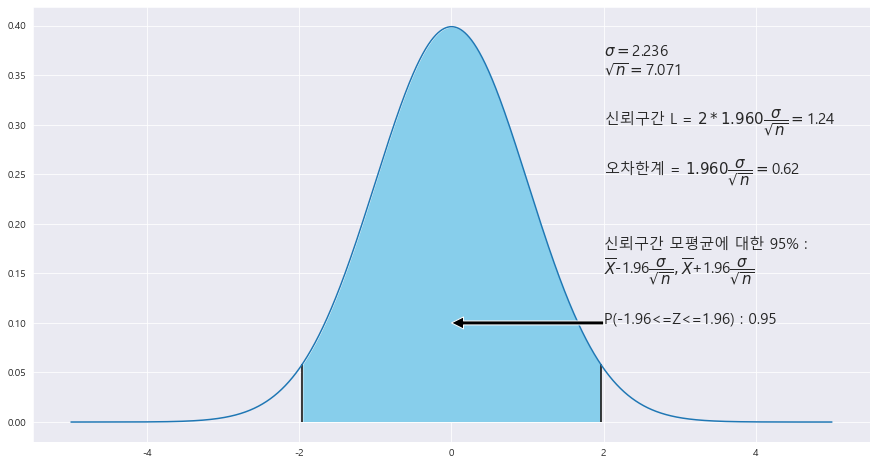

In [41]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

#A = [2.2 , 3.1 , 3.8 , 2.7 , 4.0 , 2.6 , 2.4 , 1.6 , 2.3]
#MEANS = round(np.mean(A) ,2)
STDS = round(math.sqrt(5),3)
n = 50
#print((z_1 * STDS / math.sqrt(len(A))))
# ax.text(2 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + f'{round(MEANS - (z_1 * STDS ),2)} ~ {round(MEANS + (z_1 * STDS ),2)}' , fontsize= 15)


ax.text(2 , .35,  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $1.074')

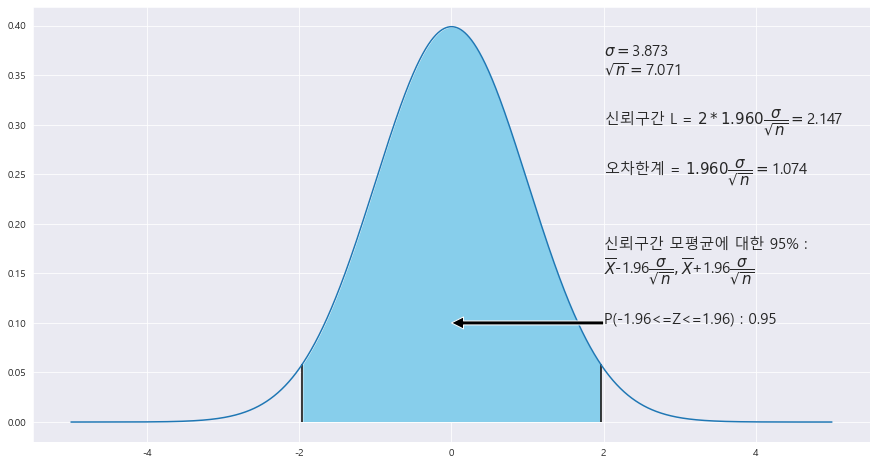

In [42]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

#A = [2.2 , 3.1 , 3.8 , 2.7 , 4.0 , 2.6 , 2.4 , 1.6 , 2.3]
#MEANS = round(np.mean(A) ,2)
STDS = round(math.sqrt(15),3)
n = 50
#print((z_1 * STDS / math.sqrt(len(A))))
# ax.text(2 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + f'{round(MEANS - (z_1 * STDS ),2)} ~ {round(MEANS + (z_1 * STDS ),2)}' , fontsize= 15)


ax.text(2 , .35,  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $1.64')

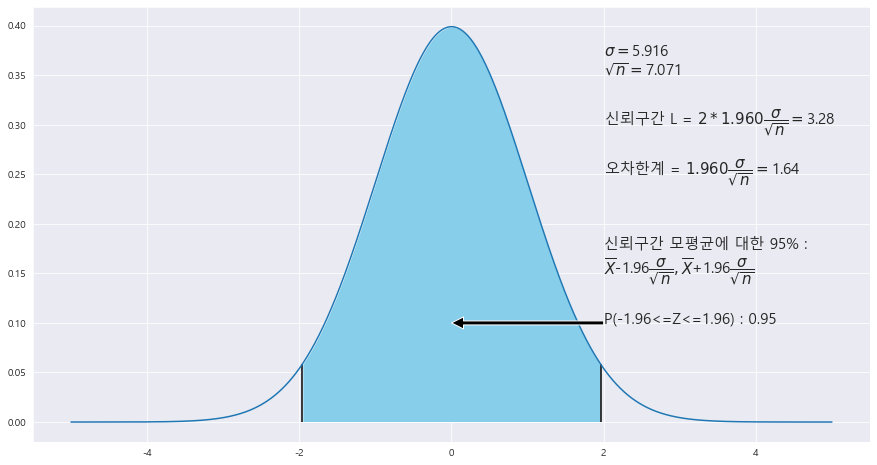

In [43]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

#A = [2.2 , 3.1 , 3.8 , 2.7 , 4.0 , 2.6 , 2.4 , 1.6 , 2.3]
#MEANS = round(np.mean(A) ,2)
STDS = round(math.sqrt(35),3)
n = 50
#print((z_1 * STDS / math.sqrt(len(A))))
# ax.text(2 , .25, f'신뢰구간 모평균에 대한 {trust}% : \n' + f'{round(MEANS - (z_1 * STDS ),2)} ~ {round(MEANS + (z_1 * STDS ),2)}' , fontsize= 15)


ax.text(2 , .35,  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $0.554')

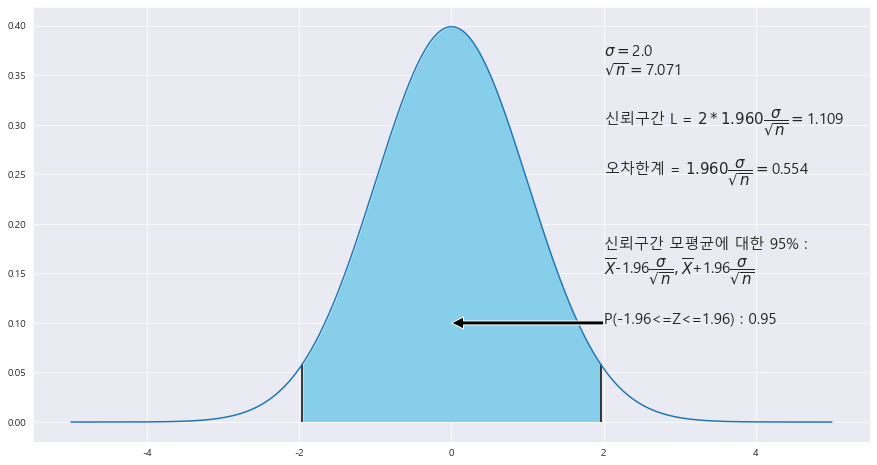

In [44]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)


STDS = round(math.sqrt(4),3) #모표준편차
n = 50



ax.text(2 , .35,  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $0.392')

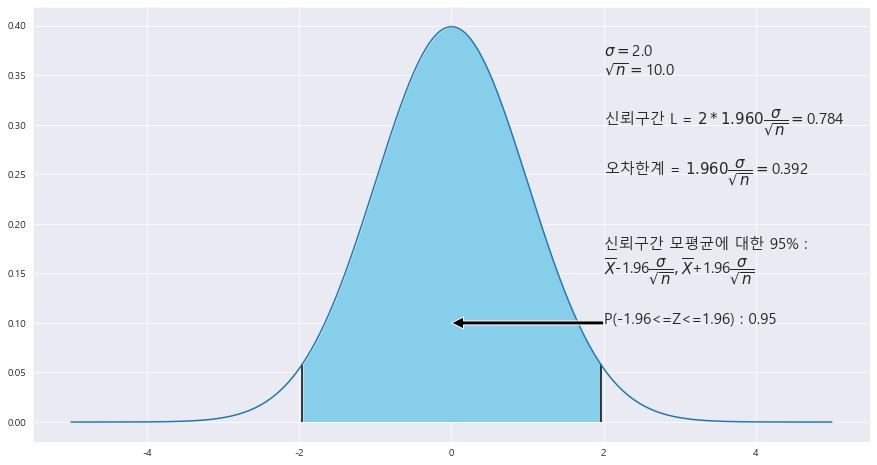

In [45]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)


STDS = round(math.sqrt(4),3) #모표준편차
n = 100



ax.text(2 , .35,  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $0.277')

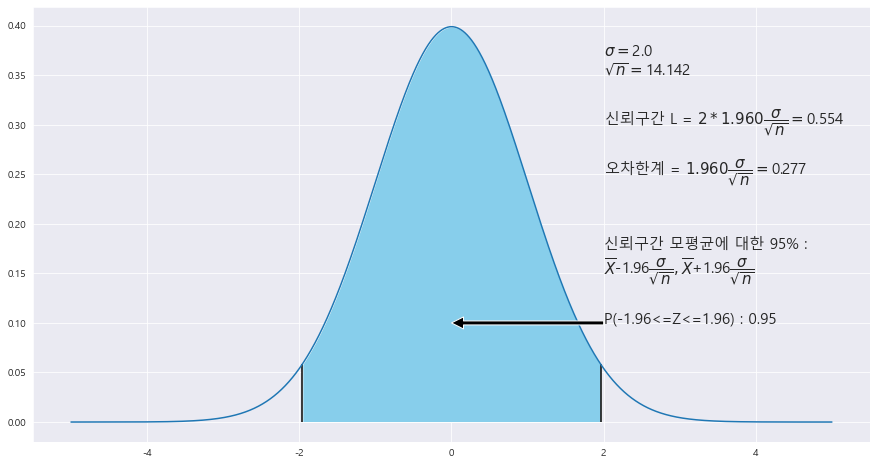

In [46]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)


STDS = round(math.sqrt(4),3) #모표준편차
n = 200



ax.text(2 , .35,  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $0.175')

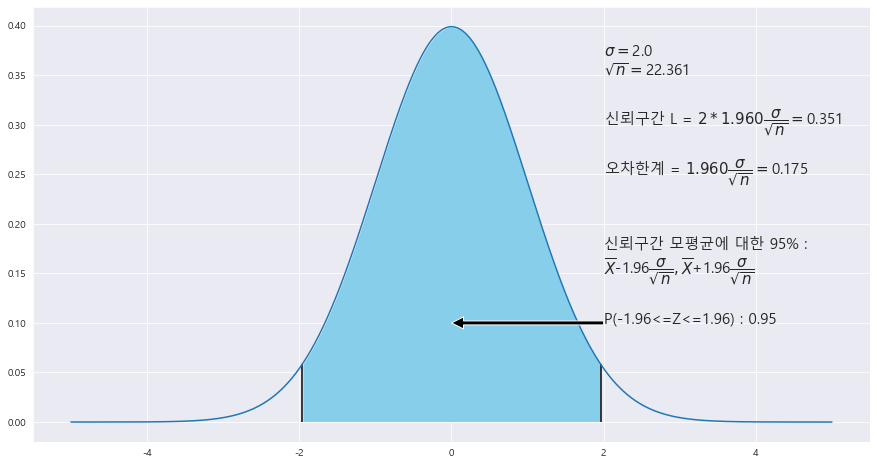

In [47]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)


STDS = round(math.sqrt(4),3) #모표준편차
n = 500



ax.text(2 , .35,  r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96


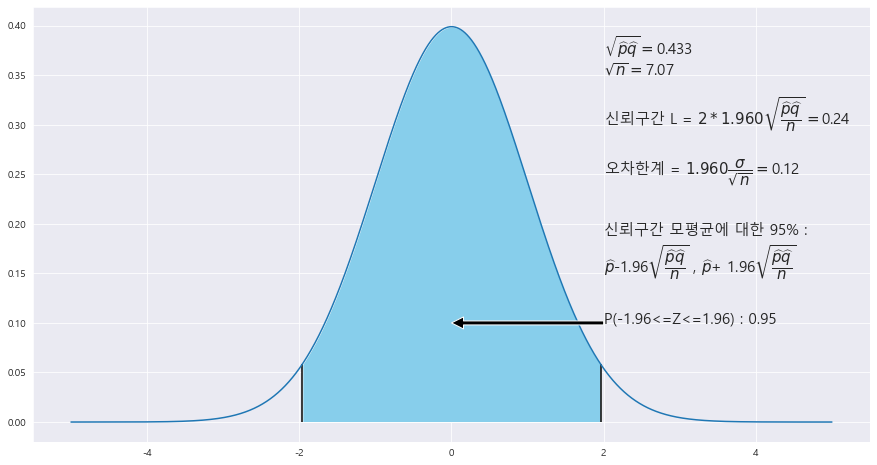

In [48]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)




# print((z_1 * STDS / math.sqrt(len(A))))

# STDS = round(math.sqrt(4),3) #모표준편차
RATIO = 0.75
n = 50


ax.text(2 , .35,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)}',fontsize=15)


ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round(2* z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)




print(z_1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96


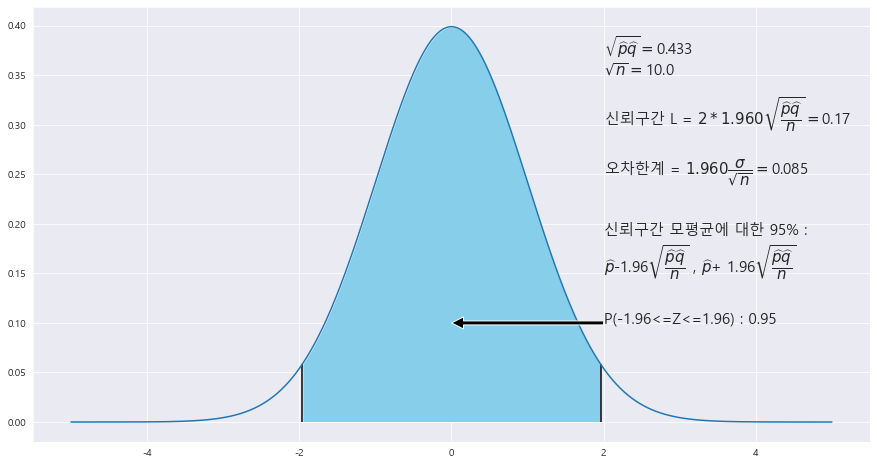

In [49]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)




# print((z_1 * STDS / math.sqrt(len(A))))

# STDS = round(math.sqrt(4),3) #모표준편차
RATIO = 0.75
n = 100


ax.text(2 , .35,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)}',fontsize=15)


ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round(2* z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)




print(z_1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96


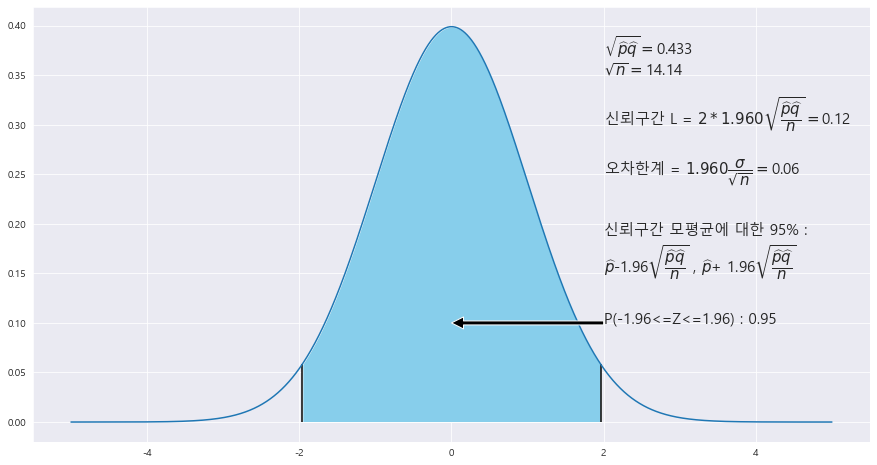

In [50]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)




# print((z_1 * STDS / math.sqrt(len(A))))

# STDS = round(math.sqrt(4),3) #모표준편차
RATIO = 0.75
n = 200


ax.text(2 , .35,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)}',fontsize=15)


ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round(2* z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round( z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)




print(z_1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1.96


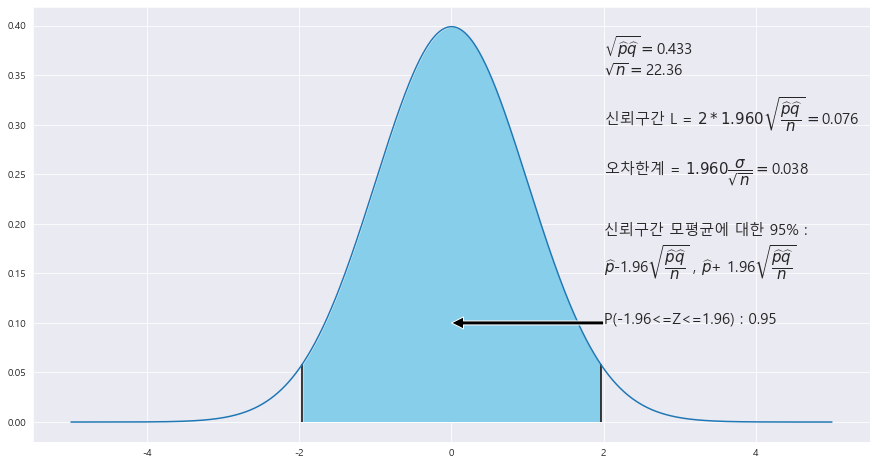

In [51]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰구간

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\widehat{p}$' +f'-{z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$' +' , '+ r'$\widehat{p}$' +f'+ {z_1}' + r'$\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}}$',fontsize=15)




# print((z_1 * STDS / math.sqrt(len(A))))

# STDS = round(math.sqrt(4),3) #모표준편차
RATIO = 0.75
n = 500

ax.text(2 , .35,  r'$\sqrt{\widehat{p}\widehat{q}} = $' + f'{round(math.sqrt(RATIO * (1-RATIO)),3)}\n'  + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),2)}',fontsize=15)


ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\sqrt{\dfrac{\widehat{p}\widehat{q}}{n}} = $' % z_1 + f'{round(2* z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)

ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * math.sqrt(RATIO * (1-RATIO) / n),3)}',fontsize=15)




print(z_1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $0.784')

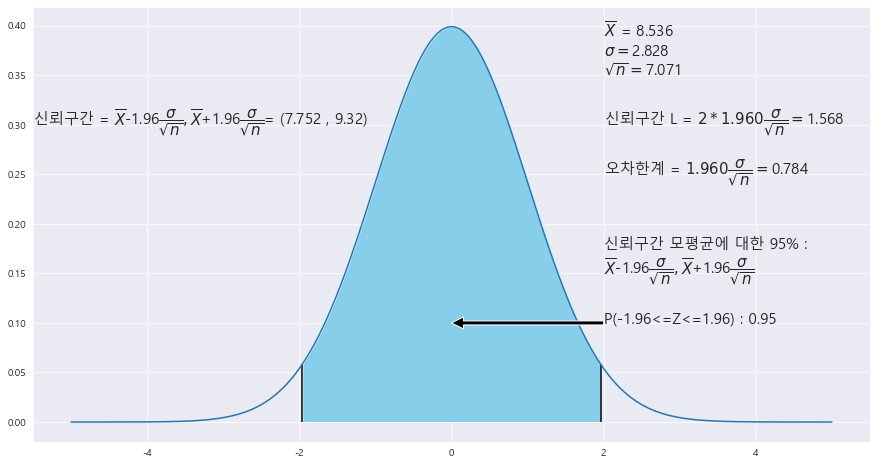

In [59]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)


STDS = round(math.sqrt(8),3) #모표준편차
n = 50
MEANS = round(426.8/ 50,3)


ax.text(2 , .35,  r'$\overline{X}$ = ' +f'{MEANS}\n'+ r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)
ax.text(-5.5 , .3,  r'신뢰구간 = $\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$' +f'= ({round(MEANS - z_1 * STDS/math.sqrt(n),3)} , {round(MEANS + z_1*STDS/math.sqrt(n),3)})',fontsize=15)
ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)



C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $0.644')

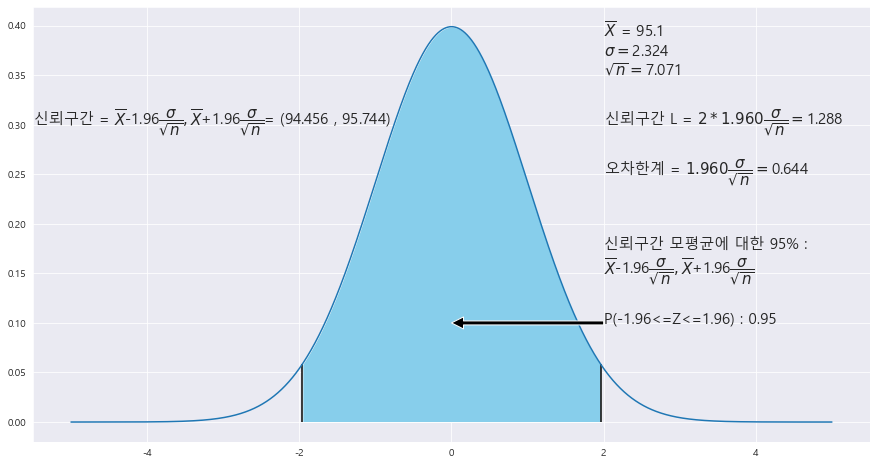

In [60]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)


STDS = round(math.sqrt(5.4),3) #모표준편차
n = 50
MEANS = 95.1


ax.text(2 , .35,  r'$\overline{X}$ = ' +f'{MEANS}\n'+ r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)
ax.text(-5.5 , .3,  r'신뢰구간 = $\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$' +f'= ({round(MEANS - z_1 * STDS/math.sqrt(n),3)} , {round(MEANS + z_1*STDS/math.sqrt(n),3)})',fontsize=15)
ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)



C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[193.27, 193.88, 253.26, 237.15, 188.83, 200.56, 274.31, 230.36, 212.08, 222.19, 198.48, 202.5, 215.35, 218.95, 233.16, 222.23, 218.53, 204.64, 206.72, 199.37]


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $8.765')

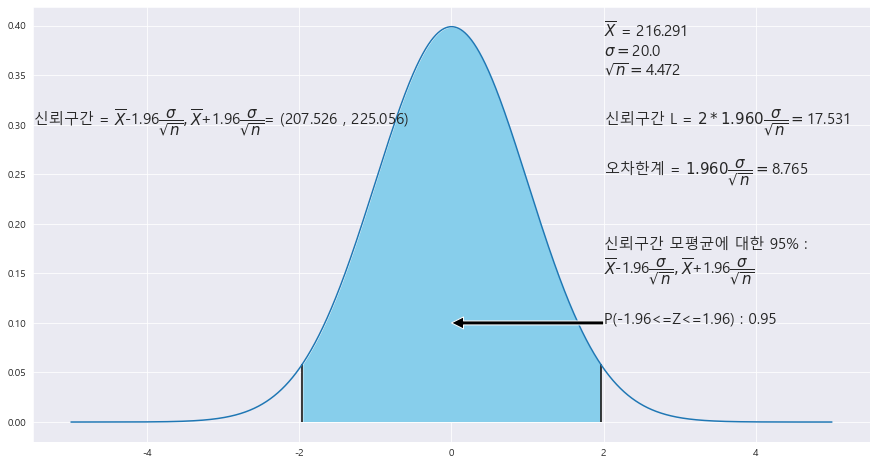

In [62]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

A = "193.27 193.88 253.26 237.15 188.83 200.56 274.31 230.36 212.08 222.19 198.48 202.50 215.35 218.95 233.16 222.23 218.53 204.64 206.72 199.37"

A = list(map(float, A.split()))
print(A)
STDS = round(math.sqrt(400) , 2) #모표준편차
n = len(A)
MEANS = np.mean(A)


ax.text(2 , .35,  r'$\overline{X}$ = ' +f'{MEANS}\n'+ r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)
ax.text(-5.5 , .3,  r'신뢰구간 = $\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$' +f'= ({round(MEANS - z_1 * STDS/math.sqrt(n),3)} , {round(MEANS + z_1*STDS/math.sqrt(n),3)})',fontsize=15)
ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)



C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


30
[95.0, 21.0, 54.0, 127.0, 109.0, 51.0, 65.0, 30.0, 98.0, 107.0, 68.0, 99.0, 69.0, 101.0, 73.0, 82.0, 100.0, 63.0, 45.0, 76.0, 72.0, 85.0, 121.0, 76.0, 117.0, 67.0, 126.0, 112.0, 83.0, 95.0]


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $8.946')

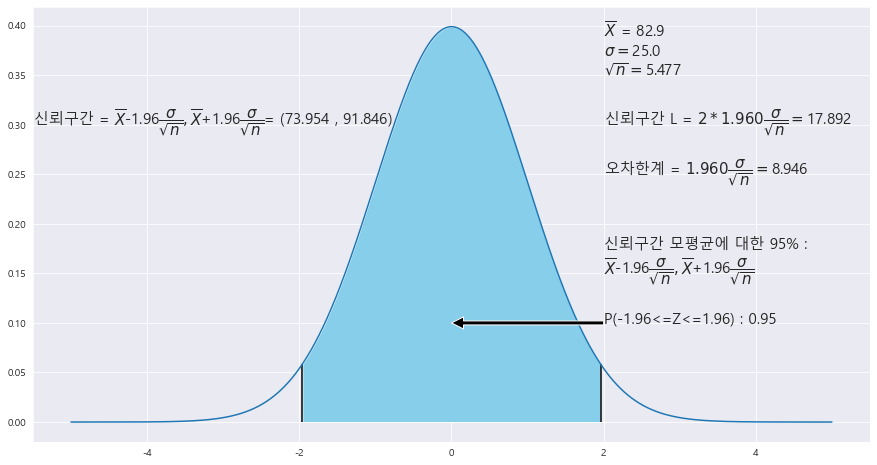

In [66]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

A = "95 21 54 127 109 51 65 30 98 107 68 99 69 101 73 82 100 63 45 76 72 85 121 76 117 67 126 112 83 95"

A = list(map(float, A.split()))
print(len(A))
print(A)
STDS = round(math.sqrt(25**2) , 2) #모표준편차
n = len(A)
MEANS = np.mean(A)


ax.text(2 , .35,  r'$\overline{X}$ = ' +f'{MEANS}\n'+ r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)
ax.text(-5.5 , .3,  r'신뢰구간 = $\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$' +f'= ({round(MEANS - z_1 * STDS/math.sqrt(n),3)} , {round(MEANS + z_1*STDS/math.sqrt(n),3)})',fontsize=15)
ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)



C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


30
[1.5, 2.9, 2.8, 1.6, 2.2, 2.5, 1.9, 2.0, 3.1, 2.7, 1.3, 1.9, 2.6, 1.9, 2.7, 1.8, 1.7, 2.2, 2.3, 2.3, 3.5, 1.8, 1.5, 2.1, 2.0, 1.5, 2.0, 2.4, 1.9, 2.3]


Text(2, 0.25, '오차한계 = ${1.960}\\dfrac{\\sigma}{\\sqrt{n}} = $0.079')

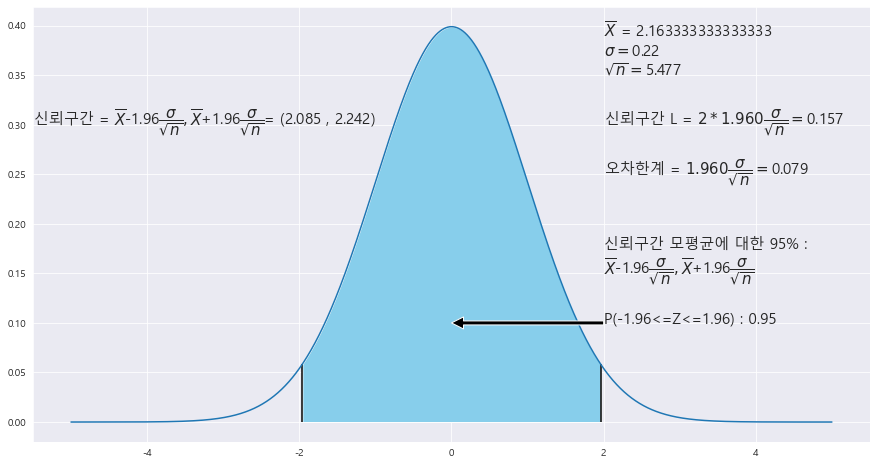

In [68]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

trust = 95 #신뢰도

# z_1 = round((0.05) / math.sqrt( 0.0018532 ) ,2)
# # z_2 = round((34.5 - 35) / math.sqrt(5.5**2 / 25) , 2)
z_1 = round(scipy.stats.norm.ppf(1 - (1-(trust/100))/2) ,3 )

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>=-z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area = scipy.stats.norm.cdf(z_1) - scipy.stats.norm.cdf(-z_1)
plt.annotate('' , xy=(0, .1), xytext=(2 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

ax.text(2 , .1, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)

ax.text(2 , .15, f'신뢰구간 모평균에 대한 {trust}% : \n' + r'$\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$',fontsize=15)

A = "1.5 2.9 2.8 1.6 2.2 2.5 1.9 2.0 3.1 2.7 1.3 1.9 2.6 1.9 2.7 1.8 1.7 2.2 2.3 2.3 3.5 1.8 1.5 2.1 2.0 1.5 2.0 2.4 1.9 2.3"

A = list(map(float, A.split()))
print(len(A))
print(A)
STDS = round(math.sqrt(0.22**2) , 2) #모표준편차
n = len(A)
MEANS = np.mean(A)


ax.text(2 , .35,  r'$\overline{X}$ = ' +f'{MEANS}\n'+ r'$\sigma = $' + f'{STDS}\n' + r'$\sqrt{n} = $' + f'{round(math.sqrt(n),3)}',fontsize=15)

ax.text(2 , .3,  r'신뢰구간 L = $2*{%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(2* z_1 * STDS / math.sqrt(n),3)}',fontsize=15)
ax.text(-5.5 , .3,  r'신뢰구간 = $\overline{X}$' +f'-{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}},\overline{X}$' + f'+{z_1}' + r'$\dfrac{\sigma}{\sqrt{n}}$' +f'= ({round(MEANS - z_1 * STDS/math.sqrt(n),3)} , {round(MEANS + z_1*STDS/math.sqrt(n),3)})',fontsize=15)
ax.text(2 , .25,  r'오차한계 = ${%.3f}\dfrac{\sigma}{\sqrt{n}} = $' % z_1 + f'{round(z_1 * STDS / math.sqrt(n),3)}',fontsize=15)

